In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
n = 2

from sklearn.model_selection import train_test_split
import sklearn.linear_model as slm
from sklearn.metrics import accuracy_score

In [2]:
def sign(x) :
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
    
def a(x, w):
    return np.dot(w, x)

def differ(w, index, x, t):
    if t * a(w, x) >= 1:
        return rand.uniform(-0.004, 0.004)
    else:
        return t * x[index] * -1

In [3]:
met = np.array([1 if k % 2 == 0 else -1 for k in range(0, 4000)])

points = np.zeros((n, 4000))

for i in range(0, n - 1):
    for j in range (0, 4000):
        points[i][j] = rand.uniform(-10, 10)

for i in range(0, 3200):
    if met[i] == 1:
        points[n - 1][i] = np.random.normal(points[0][i] + 1, 1)
    else:
        points[n - 1][i] = np.random.normal(points[0][i] - 1, 1)
        
for i in range(3200, 4000):
    if met[i] == 1:
        points[n - 1][i] = np.random.normal(points[0][i] + 1, 1)
    else:
        points[n - 1][i] = np.random.normal(points[0][i] - 1, 1)

In [4]:

points = np.vstack((np.ones((1, 4000)), points))

x_train = points[:, 0:3200].T
y_train = met[0:3200].T
x_test = points[:, 3200:4000].T
y_test = met[3200:4000].T


pred_w = np.arange(0, n + 1) * 0
next_w = pred_w

In [5]:
t = 1.0
k = (n + 1) / t

pns_index = rand.randint(0, 3199)

grad = np.array([ differ(pred_w, i, x_train[pns_index], y_train[pns_index]) for i in range(0, n + 1)])

next_w = pred_w - k * grad
t += 1.0
k = (n + 1) / t 

15362.0


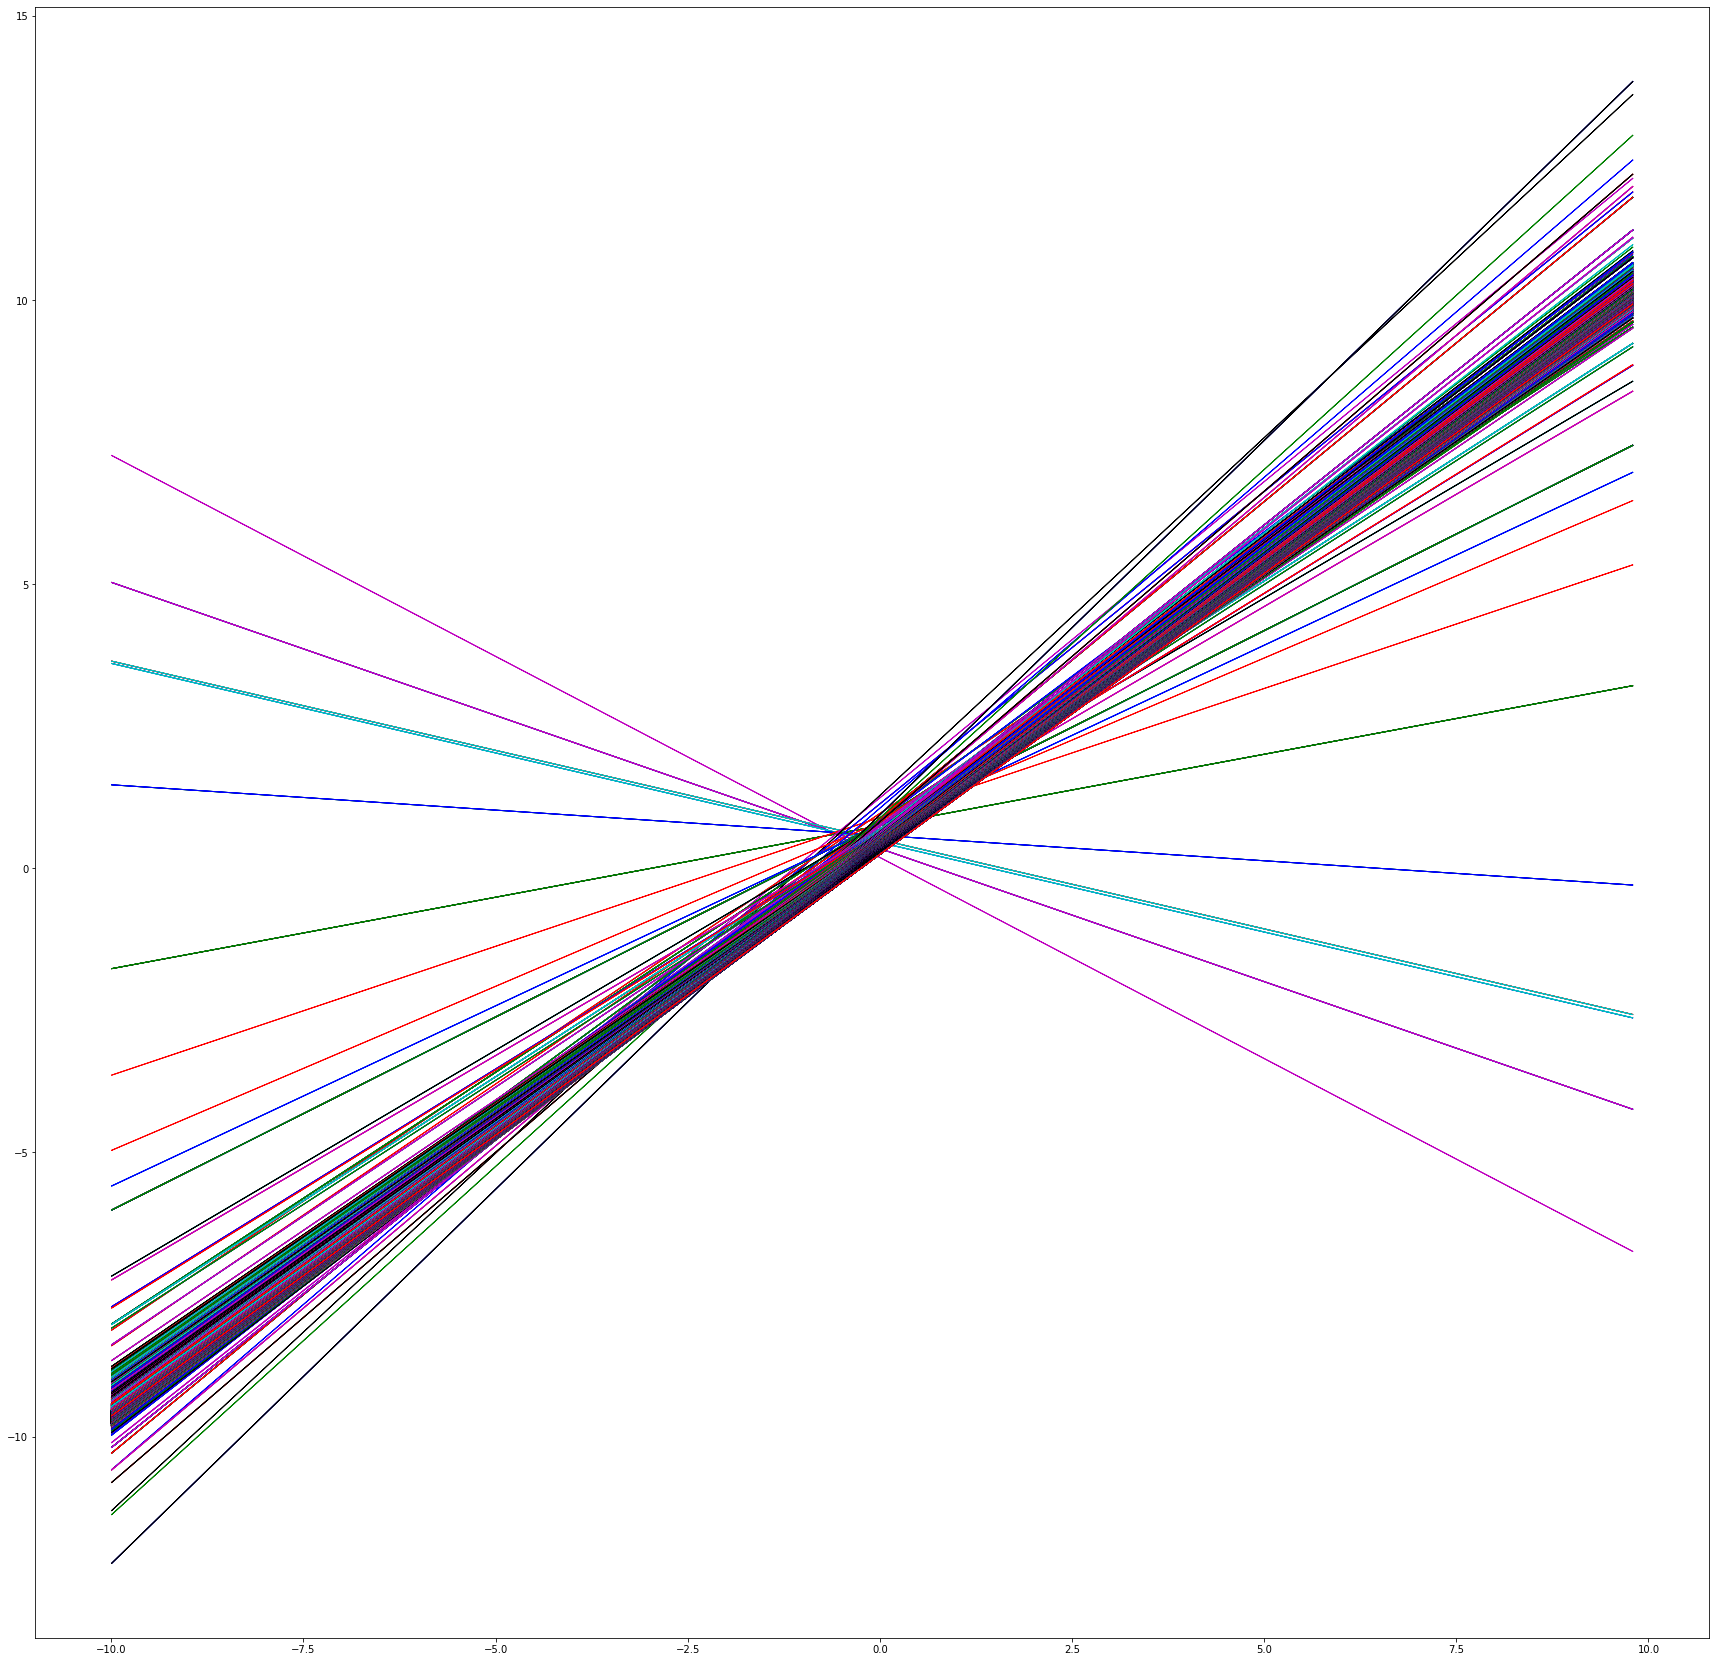

In [6]:
x = np.arange(-10, 10, 0.2)
plt.figure(figsize=(30, 30))
colors = ['b', 'g', 'r', 'c', 'k', 'm']

eps = 0.0000001

while np.linalg.norm(pred_w - next_w, 2) >= eps :
    pred_w = next_w
    pns_index = rand.randint(0, 3199)
    
    grad = np.array([differ(pred_w, i, x_train[pns_index], y_train[pns_index]) for i in range(0, n + 1) ])
    if n == 2:
        y = np.array([- next_w[0]/next_w[2] - next_w[1]/next_w[2] * d for d in x])
        plt.fill(x, y, color=colors[rand.randint(0, 5)])
    
    next_w = pred_w - k * grad  
    t += 1.0
    k = (n + 1) / t 

print (t)
plt.show()

In [7]:
answ = np.array([sign(a(next_w, x_test[i])) == y_test[i] for i in range(0, 800)])
summa = np.sum(answ)
for i in range(0, 800):
    if sign(a(next_w, x_test[i])) == 0:
        summ += 1
print ('My result = ' + str(summa/800.))

clf = slm.SGDClassifier()
clf.fit(x_train[:, 1:], y_train)
print ('SKLEARN result = ' + str(round(accuracy_score(y_test, clf.predict(x_test[:, 1:])), 100)))

My result = 0.86375
SKLEARN result = 0.855


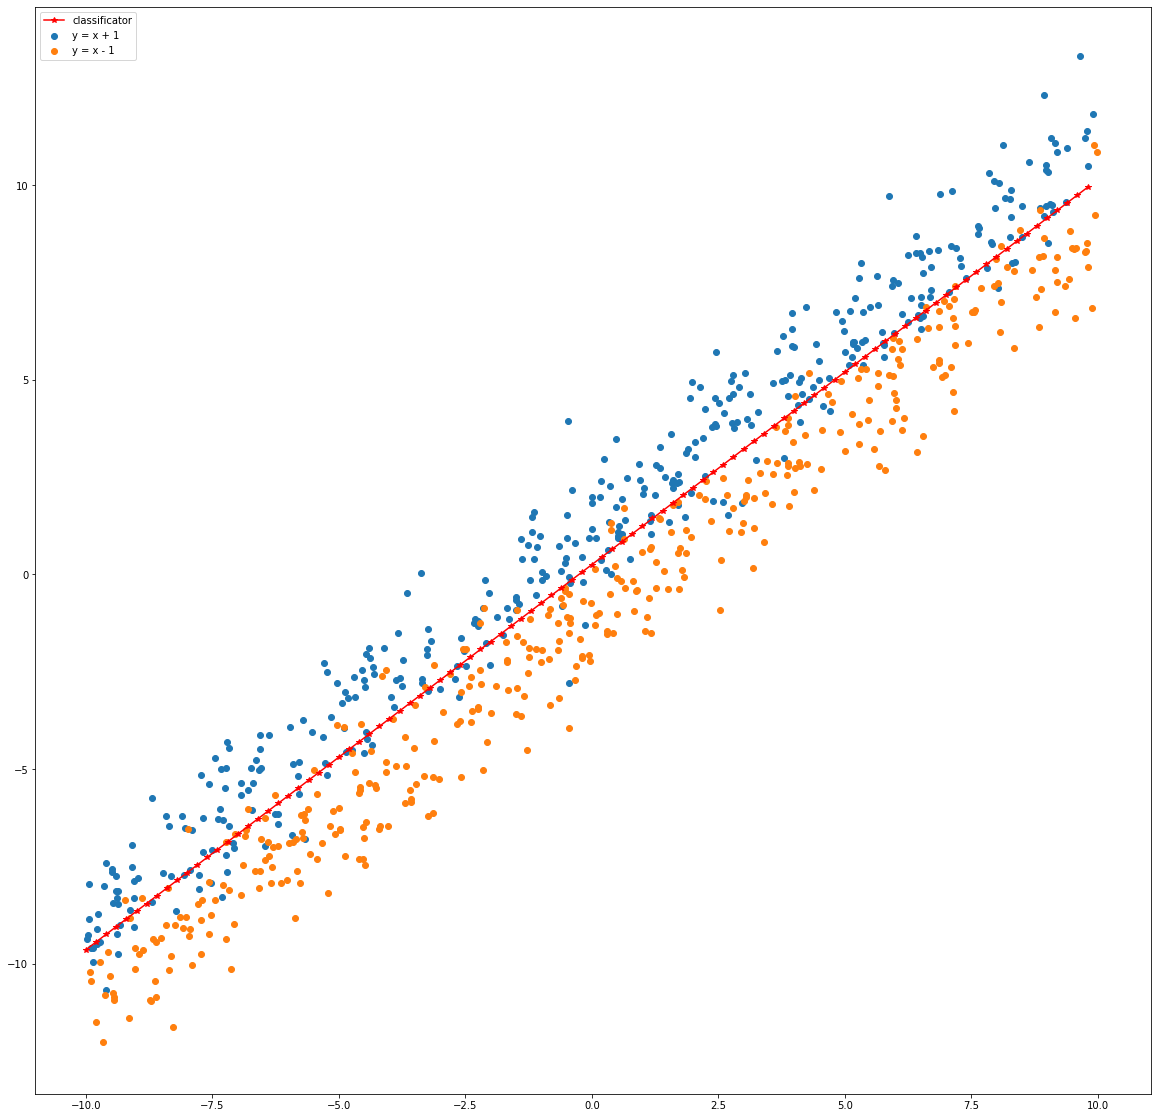

Weigth = [-1.07737063 -4.2877653   4.33585141]


In [10]:
if n == 2:
    x = np.arange(-10, 10, 0.2)
    y = np.array([- next_w[0]/next_w[2] - next_w[1]/next_w[2] * t for t in x])
    x1 = np.array([x_test[i][1] for i in range(0, 800) if y_test[i] == 1])
    y1 = np.array([x_test[i][2] for i in range(0, 800) if y_test[i] == 1])
    x2 = np.array([x_test[i][1] for i in range(0, 800) if y_test[i] == -1])
    y2 = np.array([x_test[i][2] for i in range(0, 800) if y_test[i] == -1])
    plt.figure(figsize=(20, 20))
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.plot(x, y, marker='*', color='r')
    plt.legend(('classificator', 'y = x + 1', 'y = x - 1'))
    plt.show()
print ('Weigth = ' + str(next_w))

In [9]:
#При eps <= 0.0000001 начинает очень долго работать из-за графика прямой для весов
#Коэффициент для итераций был взят из книжки, что вы скинули ))) 